# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

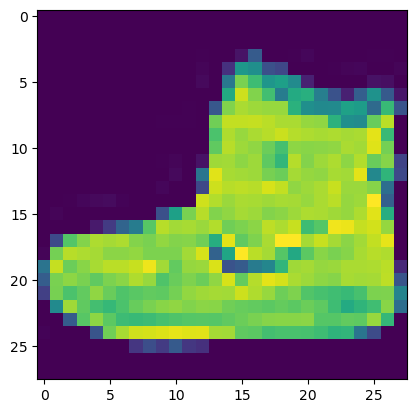

In [3]:
plt.imshow(x_train[0]);

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [4]:
np.max(x_train)

255

In [5]:
scaled_X_train = x_train / np.max(x_train)
scaled_X_test = x_test / np.max(x_test)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [8]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [11]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
          optimizer='rmsprop',
          metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [14]:
model.fit(x_train,
          y_cat_train,
          verbose=1,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1890 - accuracy: 0.8383
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3899 - accuracy: 0.8695
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3786 - accuracy: 0.8730
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3727 - accuracy: 0.8763
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3729 - accuracy: 0.8761
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3737 - accuracy: 0.8759
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3739 - accuracy: 0.8778
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3727 - accuracy: 0.8781
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3737 - accuracy: 0.8788
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.375

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [15]:
model.metrics_names

['loss', 'accuracy']

In [20]:
preds = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1000
           1       0.98      0.97      0.97      1000
           2       0.69      0.83      0.76      1000
           3       0.90      0.85      0.87      1000
           4       0.79      0.67      0.73      1000
           5       0.98      0.93      0.95      1000
           6       0.64      0.63      0.63      1000
           7       0.91      0.95      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



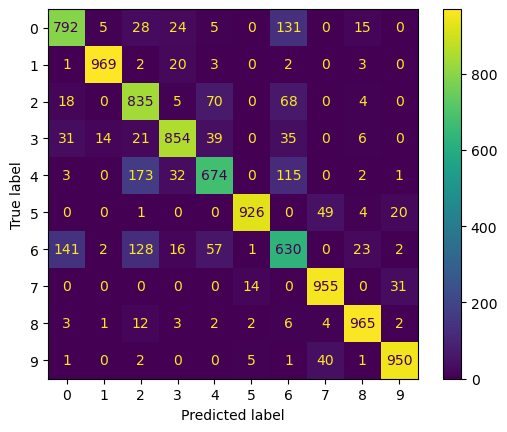

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

# Great Job!